In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
data_raw_germ_DAX = pd.read_html('https://en.wikipedia.org/wiki/DAX', match='Ticker')


In [9]:
data_raw_germ_DAX = data_raw_germ_DAX[0]
data_raw_germ_DAX.head()

,Logo,Company,Prime Standard Sector,Ticker,Index weighting (%)1,Employees,Founded
0,NaN,Adidas,Apparel,ADS.DE,2.0,"061,401 (2021)",1924
1,NaN,Airbus,Aerospace & Defence,AIR.DE,6.0,126.495 (2021),1970
2,NaN,Allianz,Financial Services,ALV.DE,7.1,"155,411 (2021)",1890
3,NaN,BASF,Chemicals,BAS.DE,3.5,"111,047 (2021)",1865
4,NaN,Bayer,Pharmaceuticals,BAYN.DE,4.8,"099,637 (2021)",1863


In [10]:
data_raw_germ_DAX = data_raw_germ_DAX.sort_values('Index weighting (%)1', ascending=False).iloc[:30]

In [5]:
stocks_DAX = {}
for index, row in data_raw_germ_DAX.iterrows():
    ticker = str(row['Ticker'])
    ticker_dax_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_dax_data.shape[0] != 0:
        stocks_DAX[ticker] = ticker_dax_data

In [12]:
data_raw_GB_FTSE100 = pd.read_html('https://en.wikipedia.org/wiki/FTSE_100_Index', match='Ticker')

In [13]:
data_raw_GB_FTSE100 = data_raw_GB_FTSE100[0]
data_raw_GB_FTSE100['Ticker'] = data_raw_GB_FTSE100['Ticker'] + '.L'
data_raw_GB_FTSE100.head()

,Company,Ticker,FTSE industry classification benchmark sector[23]
0,3i,III.L,Financial services
1,Admiral Group,ADM.L,Insurance
2,Airtel Africa,AAF.L,Telecommunications services
3,Anglo American plc,AAL.L,Mining
4,Antofagasta plc,ANTO.L,Mining


In [17]:
stocks_FTSE100 = {}
for index, row in data_raw_GB_FTSE100.iterrows():
    ticker = str(row['Ticker'])
    ticker_ftse_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_ftse_data.shape[0] != 0:
        stocks_FTSE100[ticker] = ticker_ftse_data


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AV..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BA..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BP..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BT.A.L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JD..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NG..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RR..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SN..L']: Exception('%ticker%: No timezone found, symbol may be de

In [18]:
data_raw_Fr_CAC40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40', match='Ticker' )

In [19]:
data_raw_Fr_CAC40 = data_raw_Fr_CAC40[0]
data_raw_Fr_CAC40.head()

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA


In [20]:
stocks_CAC40 = {}
for index, row in data_raw_Fr_CAC40.iterrows():
    ticker = str(row['Ticker'])
    ticker_cac_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_cac_data.shape[0] != 0:
        stocks_CAC40[ticker] = ticker_cac_data

Скачали данные об акциях из индексов за 2023 год

In [ ]:
#Германия

In [21]:
DAX_returns_dict=dict()

for ticker in stocks_DAX.keys():
    DAX_returns_dict[ticker] = np.log(stocks_DAX[ticker]['Close'] / stocks_DAX[ticker]['Close'].shift(1))
dax_DF_returns = pd.DataFrame(DAX_returns_dict).dropna()

In [ ]:
#Франция

In [22]:
CAC_returns_dict=dict()

for ticker in stocks_CAC40.keys():
    CAC_returns_dict[ticker] = np.log(stocks_CAC40[ticker]['Close'] / stocks_CAC40[ticker]['Close'].shift(1))
CAC_DF_returns = pd.DataFrame(CAC_returns_dict).dropna()

In [ ]:
#Англия

In [23]:
FTSE_returns_dict=dict()

for ticker in stocks_FTSE100.keys():
    FTSE_returns_dict[ticker] = np.log(stocks_FTSE100[ticker]['Close'] / stocks_FTSE100[ticker]['Close'].shift(1))
FTSE_DF_returns = pd.DataFrame(FTSE_returns_dict).dropna()

In [24]:
dax_DF = dax_DF_returns.corr()

In [25]:
dax_DF

,SAP.DE,SIE.DE,ALV.DE,DTE.DE,AIR.DE,BAYN.DE,MBG.DE,IFX.DE,MUV2.DE,BAS.DE,...,DTG.DE,VNA.DE,P911.DE,SY1.DE,MTX.DE,HEN3.DE,BNR.DE,BEI.DE,HNR1.DE,FRE.DE
SAP.DE,1.000000,0.412207,0.373136,0.177889,0.370602,0.121878,0.354139,0.399725,0.266353,0.281369,...,0.230115,0.217853,0.370358,0.310367,0.338533,0.230732,0.299388,0.214628,0.208851,0.177524
SIE.DE,0.412207,1.000000,0.441456,0.131204,0.438001,0.226106,0.531916,0.510569,0.290884,0.423858,...,0.434394,0.213710,0.375395,0.148143,0.326922,0.201009,0.456993,0.177103,0.113782,0.158354
ALV.DE,0.373136,0.441456,1.000000,0.183713,0.464835,0.247379,0.393906,0.293839,0.668784,0.437601,...,0.375214,0.260885,0.267602,0.275713,0.250932,0.288277,0.430271,0.361046,0.529894,0.279089
DTE.DE,0.177889,0.131204,0.183713,1.000000,0.115826,0.092396,0.052839,0.104327,0.235585,0.049052,...,0.035947,0.090844,0.181425,0.154110,0.063435,0.157324,0.111620,0.191442,0.195623,0.088764
AIR.DE,0.370602,0.438001,0.464835,0.115826,1.000000,0.133259,0.368500,0.334142,0.369384,0.404254,...,0.305119,0.204856,0.279684,0.199148,0.594929,0.207840,0.337762,0.175381,0.308433,0.202152
BAYN.DE,0.121878,0.226106,0.247379,0.092396,0.133259,1.000000,0.196533,0.182747,0.086044,0.294112,...,0.185221,0.198030,0.262649,0.170719,0.104172,0.165528,0.223492,0.112011,0.002901,0.179272
MBG.DE,0.354139,0.531916,0.393906,0.052839,0.368500,0.196533,1.000000,0.461854,0.241934,0.432988,...,0.552078,0.293523,0.524117,0.115662,0.255936,0.158122,0.413794,0.156596,0.162460,0.313558
IFX.DE,0.399725,0.510569,0.293839,0.104327,0.334142,0.182747,0.461854,1.000000,0.074030,0.414621,...,0.438792,0.355146,0.445251,0.210443,0.242720,0.110461,0.397933,-0.037791,0.044904,0.153830
MUV2.DE,0.266353,0.290884,0.668784,0.235585,0.369384,0.086044,0.241934,0.074030,1.000000,0.248951,...,0.219004,-0.003607,0.131913,0.266650,0.179731,0.238673,0.270939,0.299183,0.798333,0.261665
BAS.DE,0.281369,0.423858,0.437601,0.049052,0.404254,0.294112,0.432988,0.414621,0.248951,1.000000,...,0.429178,0.384186,0.408243,0.315694,0.249251,0.255949,0.525711,0.130026,0.157067,0.281400


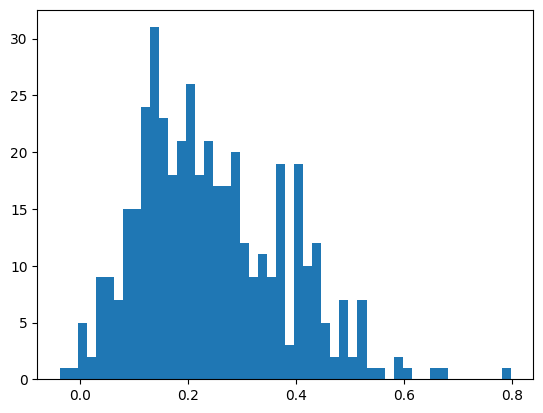

In [26]:
lst_DAX_corr = []

for i in range(len(dax_DF_returns.corr())):
    for j in range(i+1, len(dax_DF_returns.corr())):
        lst_DAX_corr.append(dax_DF_returns.corr().values[i][j])
plt.hist(lst_DAX_corr, bins=50)
plt.show()

In [27]:
FTSE_DF = FTSE_DF_returns.corr()

In [28]:
FTSE_DF

,III.L,ADM.L,AAF.L,AAL.L,ANTO.L,AHT.L,ABF.L,AZN.L,AUTO.L,BME.L,...,SSE.L,STAN.L,STJ.L,TSCO.L,ULVR.L,UTG.L,VOD.L,WEIR.L,WTB.L,WPP.L
III.L,1.000000,0.319780,0.352900,0.205081,0.286622,0.501171,0.402600,0.138311,0.339718,0.351542,...,0.285358,0.360859,0.401132,0.342458,0.147941,0.297832,0.129983,0.434451,0.449462,0.424302
ADM.L,0.319780,1.000000,0.159321,0.106177,0.151627,0.163254,0.222917,0.148161,0.230333,0.184614,...,0.204176,0.143725,0.259119,0.238503,0.219959,0.239163,0.132725,0.133380,0.257981,0.190519
AAF.L,0.352900,0.159321,1.000000,0.216251,0.270393,0.281590,0.258470,0.187127,0.230329,0.222878,...,0.153859,0.376675,0.150405,0.262457,0.134827,0.207793,0.258830,0.297591,0.385806,0.207360
AAL.L,0.205081,0.106177,0.216251,1.000000,0.607780,0.292054,0.164060,0.047399,0.159815,0.153178,...,0.188510,0.234208,0.247615,0.126853,0.031829,0.218152,0.172287,0.423658,0.188782,0.289131
ANTO.L,0.286622,0.151627,0.270393,0.607780,1.000000,0.443957,0.128959,0.132883,0.207987,0.185074,...,0.191476,0.322710,0.309102,0.080528,0.077209,0.233573,0.118233,0.546908,0.287941,0.359784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTG.L,0.297832,0.239163,0.207793,0.218152,0.233573,0.341090,0.263762,0.131861,0.423011,0.286831,...,0.439535,0.079513,0.423766,0.237145,0.103773,1.000000,0.240065,0.226736,0.297540,0.389583
VOD.L,0.129983,0.132725,0.258830,0.172287,0.118233,0.162816,0.262002,0.037690,0.202015,0.017740,...,0.178942,0.163901,0.298972,0.294198,0.109996,0.240065,1.000000,0.169343,0.313118,0.206342
WEIR.L,0.434451,0.133380,0.297591,0.423658,0.546908,0.549556,0.413939,0.120961,0.402946,0.355480,...,0.198451,0.424999,0.361658,0.209580,0.165128,0.226736,0.169343,1.000000,0.446578,0.529469
WTB.L,0.449462,0.257981,0.385806,0.188782,0.287941,0.437074,0.374668,0.093928,0.369024,0.289265,...,0.196531,0.349283,0.371336,0.243802,0.176685,0.297540,0.313118,0.446578,1.000000,0.460376


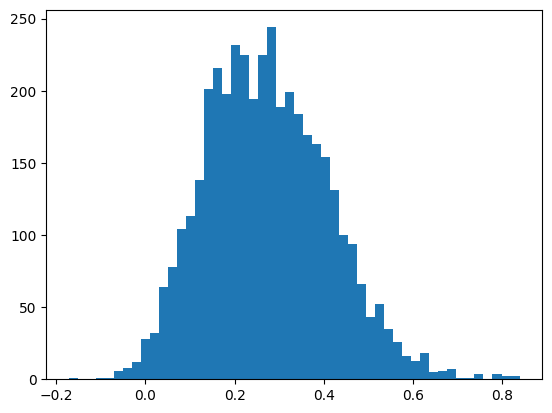

In [30]:
lst_FTSE_corr = []

for i in range(len(FTSE_DF_returns.corr())):
    for j in range(i+1, len(FTSE_DF_returns.corr())):
        lst_FTSE_corr.append(FTSE_DF_returns.corr().values[i][j])
plt.hist(lst_FTSE_corr, bins=50)
plt.show()

In [31]:
CAC_DF = CAC_DF_returns.corr()

In [32]:
CAC_DF

,AI.PA,AIR.PA,ALO.PA,MT.AS,CS.PA,BNP.PA,EN.PA,CAP.PA,CA.PA,ACA.PA,...,GLE.PA,STLAP.PA,STMPA.PA,TEP.PA,HO.PA,TTE.PA,URW.PA,VIE.PA,DG.PA,WLN.PA
AI.PA,1.000000,0.397048,0.123769,0.355934,0.439994,0.370844,0.352143,0.262843,0.185402,0.238065,...,0.272513,0.291801,0.282813,0.135937,0.379741,0.269764,0.190810,0.427990,0.572369,-0.046741
AIR.PA,0.397048,1.000000,0.105492,0.390934,0.386685,0.335276,0.236881,0.156447,0.129552,0.315156,...,0.314439,0.309810,0.190941,0.285940,0.370663,0.170094,0.261163,0.335766,0.360886,0.067317
ALO.PA,0.123769,0.105492,1.000000,0.208149,0.120648,0.160596,0.155235,0.154197,0.078339,0.127759,...,0.153343,0.114546,0.127012,0.066012,0.036606,0.080319,0.198950,0.140196,0.169007,0.111963
MT.AS,0.355934,0.390934,0.208149,1.000000,0.357168,0.522097,0.335642,0.270708,0.103426,0.371015,...,0.468858,0.456618,0.434306,0.281698,0.118483,0.313482,0.500104,0.303990,0.415590,0.089869
CS.PA,0.439994,0.386685,0.120648,0.357168,1.000000,0.538132,0.359836,0.268984,0.252267,0.420099,...,0.403491,0.368043,0.193927,0.146915,0.201528,0.425801,0.298082,0.379101,0.490803,0.019868
BNP.PA,0.370844,0.335276,0.160596,0.522097,0.538132,1.000000,0.463659,0.352874,0.173916,0.612660,...,0.656363,0.542829,0.379727,0.202371,0.065320,0.405310,0.449366,0.385072,0.563869,0.087959
EN.PA,0.352143,0.236881,0.155235,0.335642,0.359836,0.463659,1.000000,0.197662,0.254991,0.406127,...,0.378985,0.403112,0.229439,0.226327,0.041404,0.329180,0.380724,0.376934,0.558492,0.150433
CAP.PA,0.262843,0.156447,0.154197,0.270708,0.268984,0.352874,0.197662,1.000000,0.135390,0.304000,...,0.293384,0.311776,0.550380,0.148472,0.134829,0.103808,0.322350,0.409880,0.396576,0.096174
CA.PA,0.185402,0.129552,0.078339,0.103426,0.252267,0.173916,0.254991,0.135390,1.000000,0.191737,...,0.162535,0.165152,0.162296,-0.055596,0.044405,0.180482,0.198642,0.242518,0.301925,0.147001
ACA.PA,0.238065,0.315156,0.127759,0.371015,0.420099,0.612660,0.406127,0.304000,0.191737,1.000000,...,0.677846,0.350605,0.194994,0.180585,0.092381,0.393678,0.326241,0.245133,0.419225,0.070569


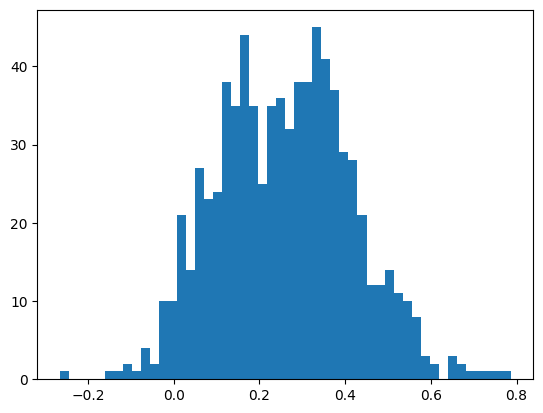

In [33]:
lst_CAC_corr = []

for i in range(len(CAC_DF_returns.corr())):
    for j in range(i+1, len(CAC_DF_returns.corr())):
        lst_CAC_corr.append(CAC_DF_returns.corr().values[i][j])
plt.hist(lst_CAC_corr, bins=50)
plt.show()

In [34]:
from scipy.stats import norm

In [35]:

def _calc_pearson_stat(corr: CAC_DF_returns.corr(), gamma_0, N):

    def z_transform(y):
        return 0.5* np.log((1 + y) / (1 - y))

    def statistics(y):
        if y == 1:
            return np.inf
        if y == -1:
            return -np.inf

        return np.sqrt(N-2) * (z_transform(y) - z_transform( gamma_0))

    transformer = np.vectorize(statistics)
    return transformer(corr)


In [36]:
import numpy as np

def compute_bounds(correlation_matrix, alpha, gamma_0):
    upper_bounds = []
    lower_bounds = []

    ce = norm.ppf(0.05)
    cn = norm.ppf(1-(0.05))

      # Вычисление верхних и нижних границ для каждой пары (i, j)
    for i in range(N):
        for j in range(N):
            if i < j:


                  # Проверка гипотезы для верхней границы
                if correlation_matrix[i,j] >= ce:

                    upper_bounds.append(correlation_matrix[i, j])

                  # Проверка гипотезы для нижней границы
                if correlation_matrix[i,j] > cn:
                    lower_bounds.append(correlation_matrix[i, j])

    return upper_bounds, lower_bounds




In [37]:
N = CAC_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.05
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(CAC_DF_returns.corr())


In [38]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_fr = []
K1f = []
K2f = []
K1=0
K2 = 0
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = _calc_pearson_stat(matrix, gamma_0, N)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_fr.append(abs(len(upper_bounds)-len(lower_bounds)))
  K1f.append(abs((len(upper_bounds)-len(lower_bounds))/M))
  K2f.append(abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds)))))
  K1 = K1 + ((1/22)*(abs((len(upper_bounds)-len(lower_bounds))/M)))
  K2 = K2 + ((1/22)* (abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds))))))


In [142]:
print(K1, K2)

0.4162587412587413 1.8631696407676404


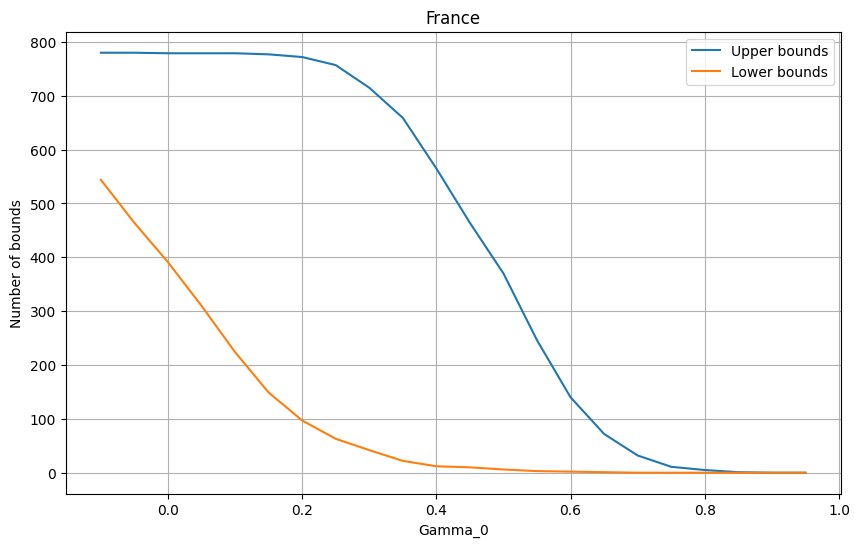

In [113]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France')
plt.legend()
plt.grid(True)
plt.show()

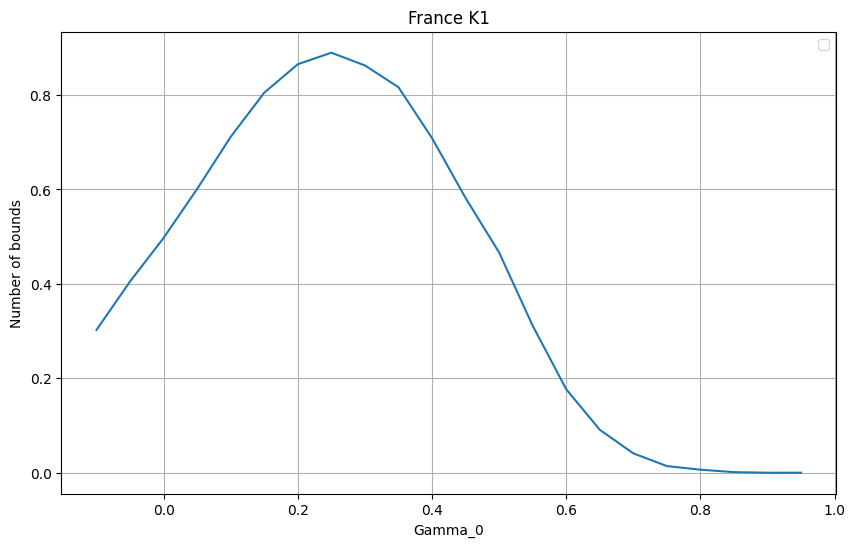

In [117]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values,K1)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K1')
plt.legend()
plt.grid(True)
plt.show()

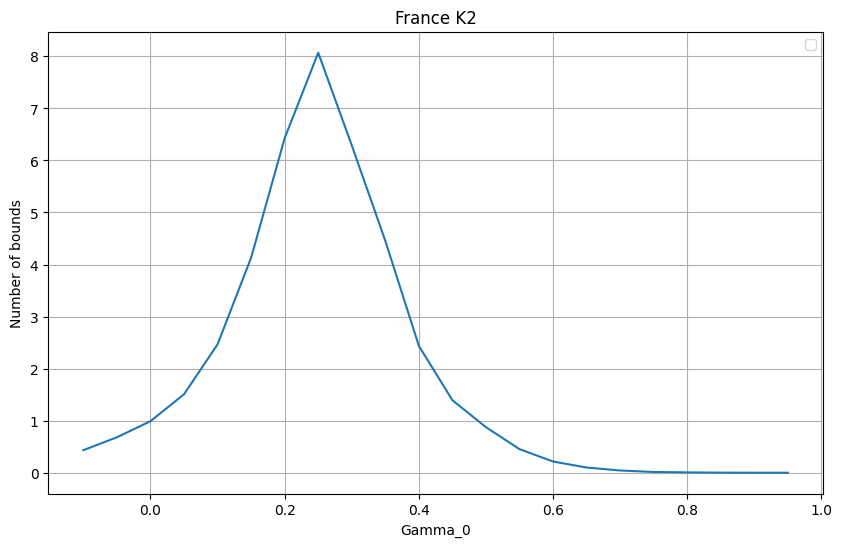

In [115]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K2)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K2')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
N = FTSE_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(FTSE_DF_returns.corr())

In [147]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_eng = []
K1e = []
K2e = []
K1=0
K2=0
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = _calc_pearson_stat(matrix, gamma_0, N)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_eng.append(len(upper_bounds)-len(lower_bounds))
  K1e.append(abs((len(upper_bounds)-len(lower_bounds))/M))
  K2e.append(abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds)))))
  K1 = K1 + ((1/22)*(abs((len(upper_bounds)-len(lower_bounds))/M)))
  K2 = K2 + ((1/22)* (abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds))))))


In [148]:
print(K1, K2)

0.2855181023720349 0.761018834024515


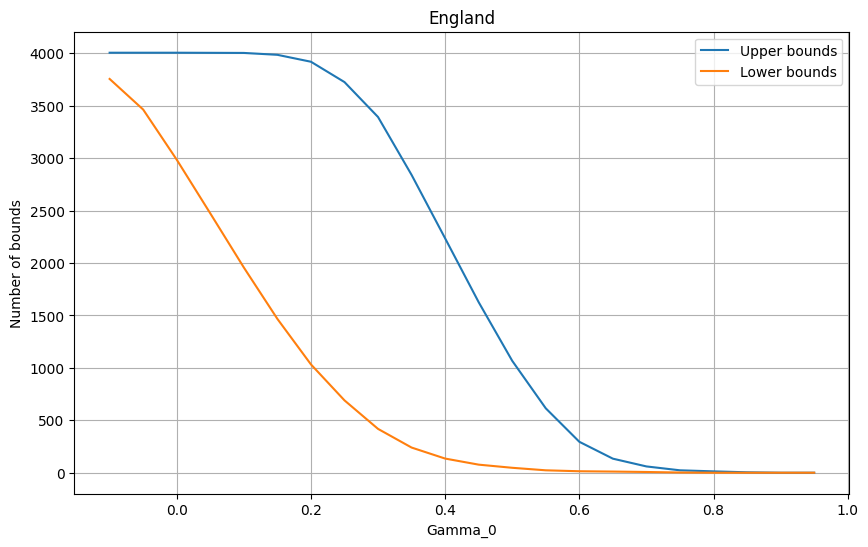

In [120]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('England')
plt.legend()
plt.grid(True)
plt.show()

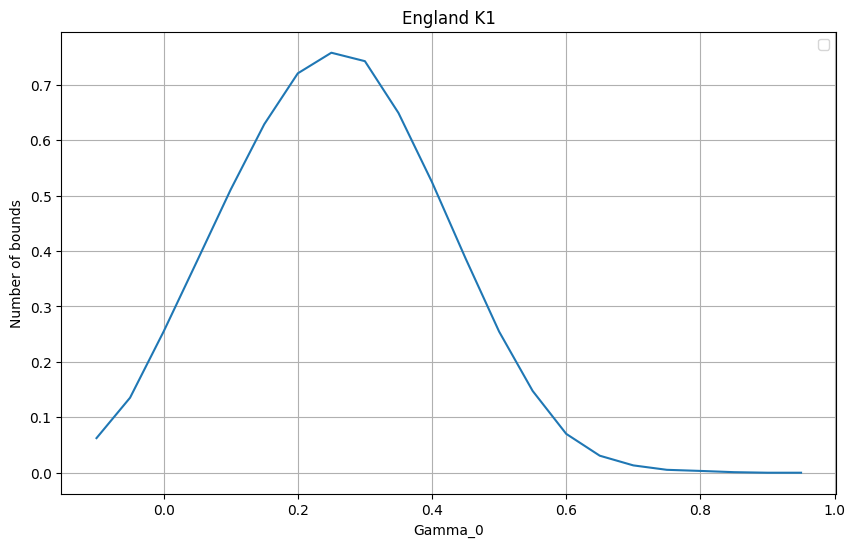

In [121]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K1)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('England K1')
plt.legend()
plt.grid(True)
plt.show()

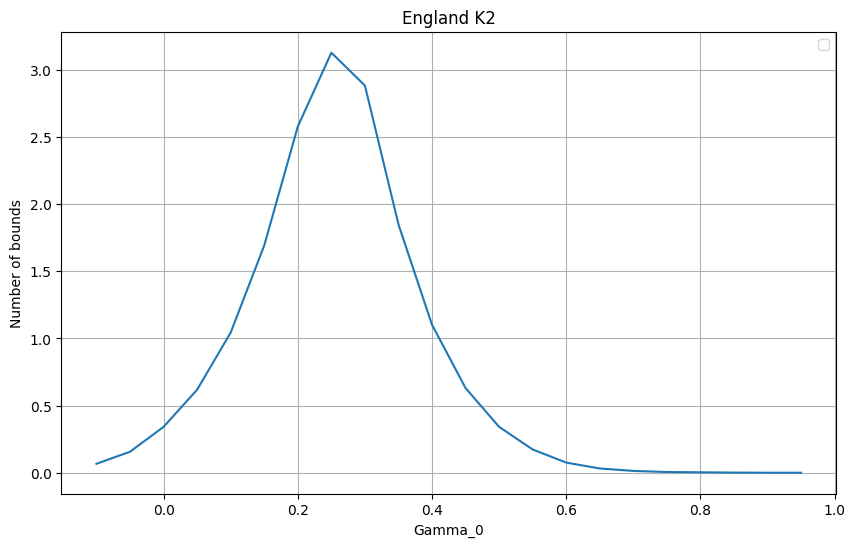

In [122]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K2)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('England K2')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
N = dax_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(dax_DF_returns.corr())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [27]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_germ = []
K1g =[]
K2g = []
K1=0
K2=0

for gamma_0 in gamma_0_values:

  correlation_matrix = []
  correlation_matrix = _calc_pearson_stat(matrix, gamma_0, N)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_germ.append(len(upper_bounds)-len(lower_bounds))
  K1g.append(abs((len(upper_bounds)-len(lower_bounds))/M))
  K2g.append(abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds)))))
  K1 = K1 + ((1/22)*(abs((len(upper_bounds)-len(lower_bounds))/M)))
  K2 = K2 + ((1/22)* (abs((len(upper_bounds)-len(lower_bounds)))/abs((len(lower_bounds)+(M-len(upper_bounds))))))


In [28]:
print(K1, K2)

0.4854754440961337 5.980235570721622


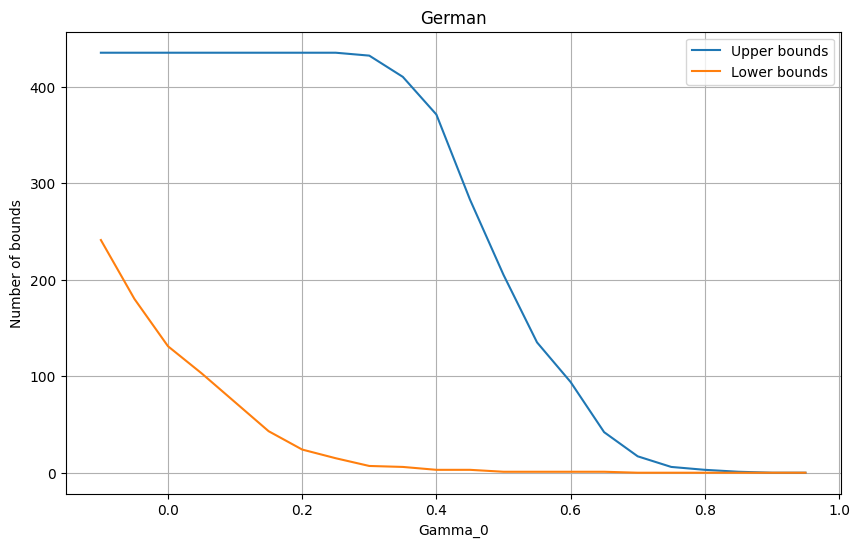

In [125]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('German')
plt.legend()
plt.grid(True)
plt.show()

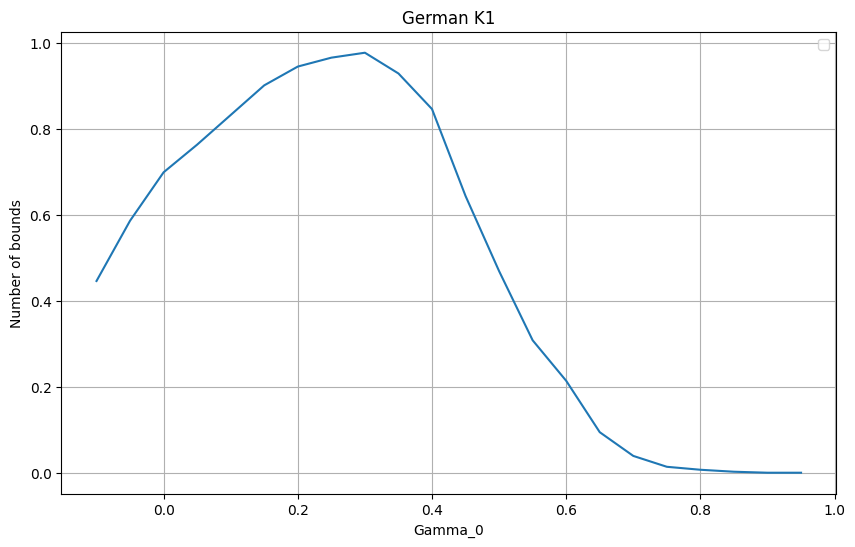

In [127]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K1)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('German K1')
plt.legend()
plt.grid(True)
plt.show()

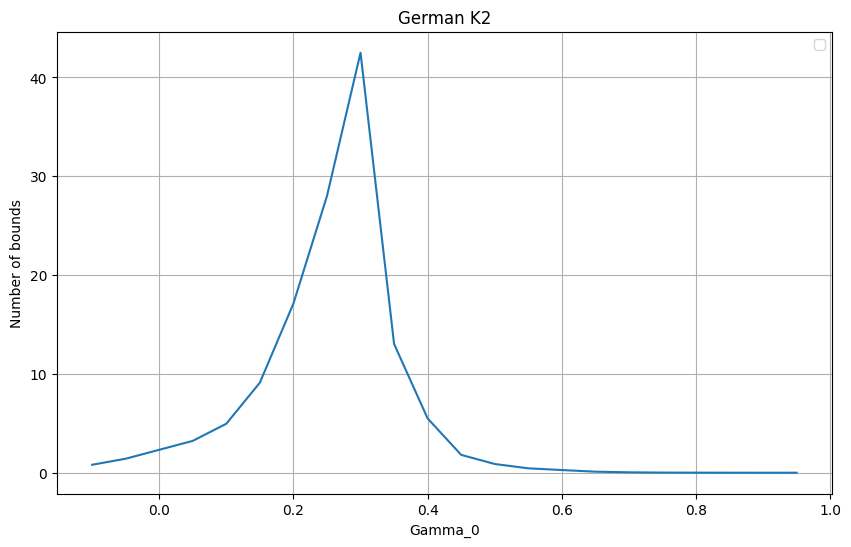

In [128]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, K2)
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('German K2')
plt.legend()
plt.grid(True)
plt.show()

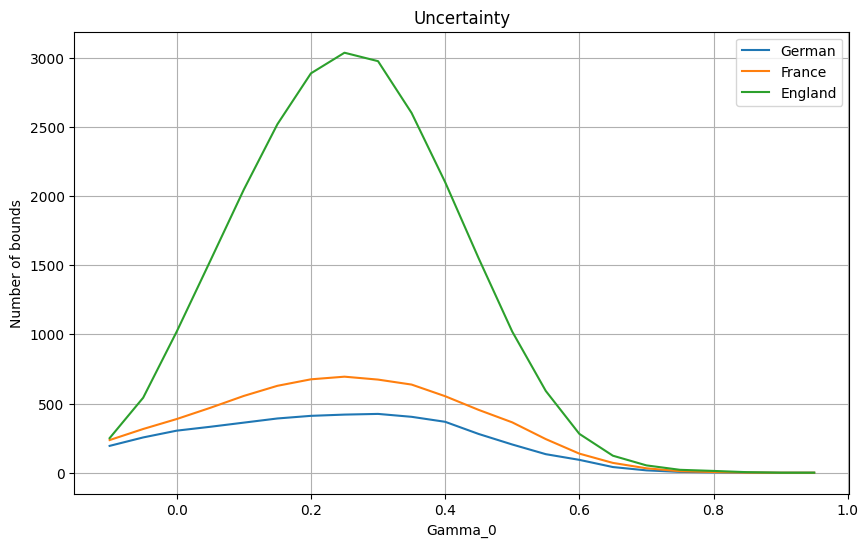

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, uncertainty_germ, label='German')
plt.plot(gamma_0_values, uncertainty_fr, label='France')
plt.plot(gamma_0_values, uncertainty_eng, label='England')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('Uncertainty')
plt.legend()
plt.grid(True)
plt.show()

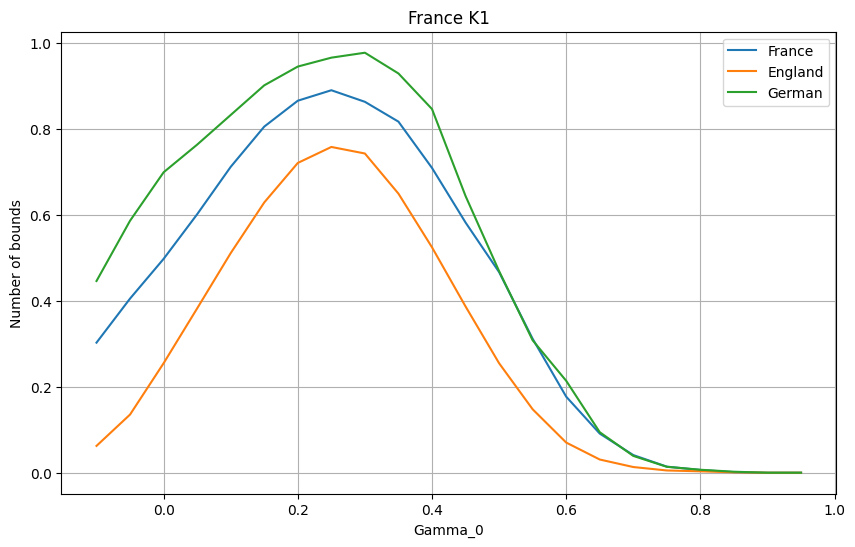

In [137]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values,K1f, label='France')
plt.plot(gamma_0_values,K1e, label='England')
plt.plot(gamma_0_values,K1g, label='German')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K1')
plt.legend()
plt.grid(True)
plt.show()

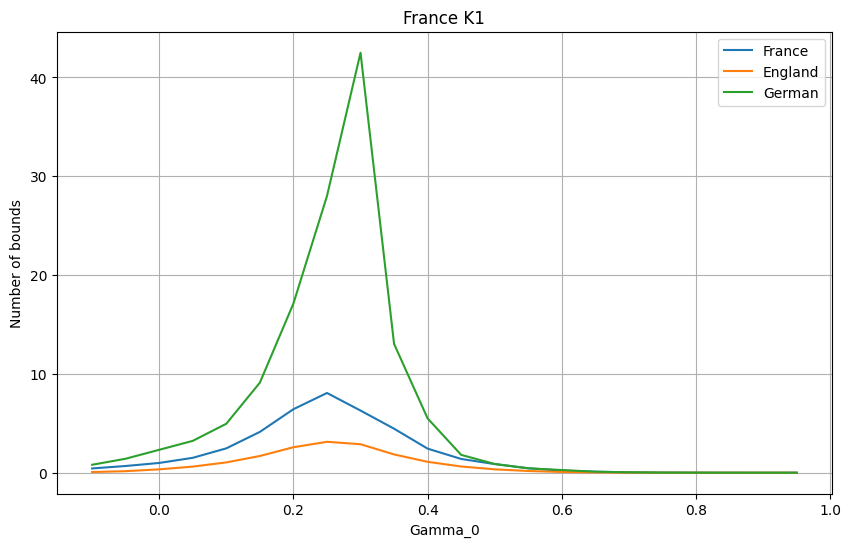

In [138]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values,K2f, label='France')
plt.plot(gamma_0_values,K2e, label='England')
plt.plot(gamma_0_values,K2g, label='German')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France K1')
plt.legend()
plt.grid(True)
plt.show()